# Big Data Technologies @ UCP

Welcome to this hands-on class on building Big Data applications using Hadoop,  HDFS, MapReduce and Hive. 

This Jupyter Notebook exemplifies how to:
- [install Java](#install_java)
- [install Hadoop](#install_hadoop)
- [run HDFS operations](#hdfs)
- [install Hive](#install_hive)
- [run Hive programs](#hive)
- [solve a "real" challenge](#challenge)


In [1]:
# constants
HADOOP_VERSION = "3.3.4"
HADOOP_HOME = "/usr/local/hadoop-"+HADOOP_VERSION
HIVE_VERSION = "3.1.2"
HIVE_HOME = "/usr/local/apache-hive-"+HIVE_VERSION+"-bin"
GIT_REPOSITORY = "/malcosta/bigdatatechnologies"
GIT_FILES = "https://raw.githubusercontent.com" + GIT_REPOSITORY + "/main"

# Licensing

*The source code in this notebook is licensed under the* [*Apache License, Version 2.0*](https://www.apache.org/licenses/LICENSE-2.0).

*This notebook is licensed under the* [*Creative Commons Attribution-NonCommercial-ShareAlike 4.0 License*](https://creativecommons.org/licenses/by-nc-sa/4.0).

Developed by [*Miguel Costa*](https://www.linkedin.com/in/migcosta/)

<a name="install_java"></a>
# Java Installation

It needs Java version 8 for Hive compatibility

In [2]:
# check current Java version
!java -version

openjdk version "11.0.16" 2022-07-19
OpenJDK Runtime Environment (build 11.0.16+8-post-Ubuntu-0ubuntu118.04)
OpenJDK 64-Bit Server VM (build 11.0.16+8-post-Ubuntu-0ubuntu118.04, mixed mode, sharing)


In [3]:
!apt-get update > /dev/null

In [4]:
# install JAVA version 8
!apt-get install openjdk-8-jre > /dev/null

In [5]:
import os
os.environ['JAVA_HOME'] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ['PATH'] = os.environ['JAVA_HOME']+"/bin:"+os.environ['PATH']

In [6]:
# check environment variablea
!echo $JAVA_HOME
!echo $PATH

/usr/lib/jvm/java-8-openjdk-amd64
/usr/lib/jvm/java-8-openjdk-amd64/bin:/opt/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin


In [7]:
!java -version

openjdk version "1.8.0_342"
OpenJDK Runtime Environment (build 1.8.0_342-8u342-b07-0ubuntu1~18.04-b07)
OpenJDK 64-Bit Server VM (build 25.342-b07, mixed mode)


<a name="install_hadoop"></a>
# Hadoop Installation (Single Node)

In [8]:
# download hadoop (check last version at https://hadoop.apache.org/releases.html)
!wget https://downloads.apache.org/hadoop/common/hadoop-{HADOOP_VERSION}/hadoop-{HADOOP_VERSION}.tar.gz

--2022-10-18 21:20:11--  https://downloads.apache.org/hadoop/common/hadoop-3.3.4/hadoop-3.3.4.tar.gz
Resolving downloads.apache.org (downloads.apache.org)... 135.181.214.104, 88.99.95.219, 2a01:4f9:3a:2c57::2, ...
Connecting to downloads.apache.org (downloads.apache.org)|135.181.214.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 695457782 (663M) [application/x-gzip]
Saving to: ‘hadoop-3.3.4.tar.gz’

hadoop-3.3.4.tar.gz 100%[===================>] 663.24M  28.5MB/s    in 24s     

2022-10-18 21:20:36 (27.6 MB/s) - ‘hadoop-3.3.4.tar.gz’ saved [695457782/695457782]



In [9]:
# uncompress hadoop file
!tar -xzvf hadoop-{HADOOP_VERSION}.tar.gz > /dev/null

In [10]:
# move hadoop directory
!mv hadoop-{HADOOP_VERSION}/ /usr/local/

In [11]:
# set HADOOP_HOME environment variable
os.environ['HADOOP_HOME'] = HADOOP_HOME

In [12]:
# check environment variable
!echo $HADOOP_HOME

/usr/local/hadoop-3.3.4


In [13]:
# see list of Hadoop commands
!{HADOOP_HOME}/bin/hadoop

Usage: hadoop [OPTIONS] SUBCOMMAND [SUBCOMMAND OPTIONS]
 or    hadoop [OPTIONS] CLASSNAME [CLASSNAME OPTIONS]
  where CLASSNAME is a user-provided Java class

  OPTIONS is none or any of:

buildpaths                       attempt to add class files from build tree
--config dir                     Hadoop config directory
--debug                          turn on shell script debug mode
--help                           usage information
hostnames list[,of,host,names]   hosts to use in slave mode
hosts filename                   list of hosts to use in slave mode
loglevel level                   set the log4j level for this command
workers                          turn on worker mode

  SUBCOMMAND is one of:


    Admin Commands:

daemonlog     get/set the log level for each daemon

    Client Commands:

archive       create a Hadoop archive
checknative   check native Hadoop and compression libraries availability
classpath     prints the class path needed to get the Hadoop jar and the
    

In [14]:
# see Hadoop version
!{HADOOP_HOME}/bin/hadoop version

Hadoop 3.3.4
Source code repository https://github.com/apache/hadoop.git -r a585a73c3e02ac62350c136643a5e7f6095a3dbb
Compiled by stevel on 2022-07-29T12:32Z
Compiled with protoc 3.7.1
From source with checksum fb9dd8918a7b8a5b430d61af858f6ec
This command was run using /usr/local/hadoop-3.3.4/share/hadoop/common/hadoop-common-3.3.4.jar


In [15]:
# see Hadoop environment variables 
!{HADOOP_HOME}/bin/hadoop envvars

JAVA_HOME='/usr/lib/jvm/java-8-openjdk-amd64'
HADOOP_COMMON_HOME='/usr/local/hadoop-3.3.4'
HADOOP_COMMON_DIR='share/hadoop/common'
HADOOP_COMMON_LIB_JARS_DIR='share/hadoop/common/lib'
HADOOP_COMMON_LIB_NATIVE_DIR='lib/native'
HADOOP_CONF_DIR='/usr/local/hadoop-3.3.4/etc/hadoop'
HADOOP_TOOLS_HOME='/usr/local/hadoop-3.3.4'
HADOOP_TOOLS_DIR='share/hadoop/tools'
HADOOP_TOOLS_LIB_JARS_DIR='share/hadoop/tools/lib'


<a name="hdfs"></a>
# HDFS Operations

In [16]:
# see list of HDFS commands
!{HADOOP_HOME}/bin/hdfs

Usage: hdfs [OPTIONS] SUBCOMMAND [SUBCOMMAND OPTIONS]

  OPTIONS is none or any of:

--buildpaths                       attempt to add class files from build tree
--config dir                       Hadoop config directory
--daemon (start|status|stop)       operate on a daemon
--debug                            turn on shell script debug mode
--help                             usage information
--hostnames list[,of,host,names]   hosts to use in worker mode
--hosts filename                   list of hosts to use in worker mode
--loglevel level                   set the log4j level for this command
--workers                          turn on worker mode

  SUBCOMMAND is one of:


    Admin Commands:

cacheadmin           configure the HDFS cache
crypto               configure HDFS encryption zones
debug                run a Debug Admin to execute HDFS debug commands
dfsadmin             run a DFS admin client
dfsrouteradmin       manage Router-based federation
ec                   run a HD

In [17]:
# format namenode
#!{HADOOP_HOME}/bin/hdfs namenode -format

In [18]:
# start the namenode and datanodes (and YARN)
#!nohup {HADOOP_HOME}/sbin/start-all.sh	&

In [19]:
# see the list of filesystem commands available on HDFS:
!{HADOOP_HOME}/bin/hdfs dfs

Usage: hadoop fs [generic options]
	[-appendToFile <localsrc> ... <dst>]
	[-cat [-ignoreCrc] <src> ...]
	[-checksum [-v] <src> ...]
	[-chgrp [-R] GROUP PATH...]
	[-chmod [-R] <MODE[,MODE]... | OCTALMODE> PATH...]
	[-chown [-R] [OWNER][:[GROUP]] PATH...]
	[-concat <target path> <src path> <src path> ...]
	[-copyFromLocal [-f] [-p] [-l] [-d] [-t <thread count>] [-q <thread pool queue size>] <localsrc> ... <dst>]
	[-copyToLocal [-f] [-p] [-crc] [-ignoreCrc] [-t <thread count>] [-q <thread pool queue size>] <src> ... <localdst>]
	[-count [-q] [-h] [-v] [-t [<storage type>]] [-u] [-x] [-e] [-s] <path> ...]
	[-cp [-f] [-p | -p[topax]] [-d] [-t <thread count>] [-q <thread pool queue size>] <src> ... <dst>]
	[-createSnapshot <snapshotDir> [<snapshotName>]]
	[-deleteSnapshot <snapshotDir> <snapshotName>]
	[-df [-h] [<path> ...]]
	[-du [-s] [-h] [-v] [-x] <path> ...]
	[-expunge [-immediate] [-fs <path>]]
	[-find <path> ... <expression> ...]
	[-get [-f] [-p] [-crc] [-ignoreCrc] [-t <thread count>

In [20]:
# list txt files (examples) in local file system
!ls {HADOOP_HOME}/*.txt

/usr/local/hadoop-3.3.4/LICENSE.txt  /usr/local/hadoop-3.3.4/README.txt
/usr/local/hadoop-3.3.4/NOTICE.txt


In [21]:
# create 2 new directories in HDFS
!{HADOOP_HOME}/bin/hdfs dfs -mkdir ~/input1/
!{HADOOP_HOME}/bin/hdfs dfs -mkdir ~/input2/

In [22]:
# copy input (txt) files from local file system to HDFS input directory
!{HADOOP_HOME}/bin/hdfs dfs -copyFromLocal {HADOOP_HOME}/*.txt ~/input1/

In [23]:
# copy input (txt) files between HDFS directories
!{HADOOP_HOME}/bin/hdfs dfs -cp ~/input1/* ~/input2/

In [24]:
# list txt files in HDFS directories
!{HADOOP_HOME}/bin/hdfs dfs -ls ~/input1/ ~/input2/

Found 3 items
-rw-r--r--   1 root root      15217 2022-10-18 21:21 /root/input1/LICENSE.txt
-rw-r--r--   1 root root       1541 2022-10-18 21:21 /root/input1/NOTICE.txt
-rw-r--r--   1 root root        175 2022-10-18 21:21 /root/input1/README.txt
Found 3 items
-rw-r--r--   1 root root      15217 2022-10-18 21:21 /root/input2/LICENSE.txt
-rw-r--r--   1 root root       1541 2022-10-18 21:21 /root/input2/NOTICE.txt
-rw-r--r--   1 root root        175 2022-10-18 21:21 /root/input2/README.txt


In [25]:
# delete file in HDFS
!{HADOOP_HOME}/bin/hdfs dfs -rm -r ~/input1/LICENSE.txt
!{HADOOP_HOME}/bin/hdfs dfs -ls ~/input1/

2022-10-18 21:21:15,539 INFO Configuration.deprecation: io.bytes.per.checksum is deprecated. Instead, use dfs.bytes-per-checksum
Deleted /root/input1/LICENSE.txt
Found 2 items
-rw-r--r--   1 root root       1541 2022-10-18 21:21 /root/input1/NOTICE.txt
-rw-r--r--   1 root root        175 2022-10-18 21:21 /root/input1/README.txt


In [26]:
# delete directory recursively in HDFS
!{HADOOP_HOME}/bin/hdfs dfs -rm -r ~/input1/

2022-10-18 21:21:21,311 INFO Configuration.deprecation: io.bytes.per.checksum is deprecated. Instead, use dfs.bytes-per-checksum
Deleted /root/input1


In [27]:
# list txt files in HDFS directories
!{HADOOP_HOME}/bin/hdfs dfs -ls ~/input1/ ~/input2/

ls: `/root/input1/': No such file or directory
Found 3 items
-rw-r--r--   1 root root      15217 2022-10-18 21:21 /root/input2/LICENSE.txt
-rw-r--r--   1 root root       1541 2022-10-18 21:21 /root/input2/NOTICE.txt
-rw-r--r--   1 root root        175 2022-10-18 21:21 /root/input2/README.txt


In [28]:
# show file content
!{HADOOP_HOME}/bin/hdfs dfs -cat ~/input2/README.txt

For the latest information about Hadoop, please visit our website at:

   http://hadoop.apache.org/

and our wiki, at:

   https://cwiki.apache.org/confluence/display/HADOOP/


In [29]:
# show file size
!{HADOOP_HOME}/bin/hdfs dfs -du -h ~/input2/README.txt

175  175  /root/input2/README.txt


In [30]:
# create local directory
!mkdir ~/local1

# copy input (txt) files from HDFS directory to local file system
!{HADOOP_HOME}/bin/hdfs dfs -copyToLocal ~/input2/* ~/local1/

# list local directory
!ls ~/local1/

LICENSE.txt  NOTICE.txt  README.txt


<a name="install_hive"></a>
# Hive Installation

In [31]:
# download hive (check last version at https://dlcdn.apache.org/hive/)
!wget https://dlcdn.apache.org/hive/hive-{HIVE_VERSION}/apache-hive-{HIVE_VERSION}-bin.tar.gz

--2022-10-18 21:21:49--  https://dlcdn.apache.org/hive/hive-3.1.2/apache-hive-3.1.2-bin.tar.gz
Resolving dlcdn.apache.org (dlcdn.apache.org)... 151.101.2.132, 2a04:4e42::644
Connecting to dlcdn.apache.org (dlcdn.apache.org)|151.101.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 278813748 (266M) [application/x-gzip]
Saving to: ‘apache-hive-3.1.2-bin.tar.gz’

apache-hive-3.1.2-b 100%[===================>] 265.90M   239MB/s    in 1.1s    

2022-10-18 21:21:57 (239 MB/s) - ‘apache-hive-3.1.2-bin.tar.gz’ saved [278813748/278813748]



In [32]:
# uncompress file
!tar -xzvf apache-hive-{HIVE_VERSION}-bin.tar.gz > /dev/null

In [33]:
# move hive directory
!mv apache-hive-{HIVE_VERSION}-bin/ /usr/local/

In [34]:
# download hive-site.xml
!wget {GIT_FILES}/setup/hive-default.xml.template -O {HIVE_HOME}/conf/hive-site.xml # the original file has a charset problem

--2022-10-18 21:22:01--  https://raw.githubusercontent.com/malcosta/bigdatatechnologies/main/setup/hive-default.xml.template
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 300685 (294K) [text/plain]
Saving to: ‘/usr/local/apache-hive-3.1.2-bin/conf/hive-site.xml’

/usr/local/apache-h 100%[===================>] 293.64K  --.-KB/s    in 0.005s  

2022-10-18 21:22:01 (54.9 MB/s) - ‘/usr/local/apache-hive-3.1.2-bin/conf/hive-site.xml’ saved [300685/300685]



In [35]:
# set HIVE_HOME environment variable
os.environ['HIVE_HOME'] = HIVE_HOME
os.environ['PATH'] = os.environ['PATH']+":"+os.environ['HIVE_HOME']+"/bin"

In [36]:
# setup HIVE directories in HDFS
!{HADOOP_HOME}/bin/hdfs dfs -mkdir /tmp
!{HADOOP_HOME}/bin/hdfs dfs -mkdir -p /user/hive/warehouse
!{HADOOP_HOME}/bin/hdfs dfs -chmod g+w /tmp
!{HADOOP_HOME}/bin/hdfs dfs -chmod g+w /user/hive/warehouse

mkdir: `/tmp': File exists


In [37]:
# initiate Derby Database
!{HIVE_HOME}/bin/schematool -dbType derby -initSchema

SLF4J: Class path contains multiple SLF4J bindings.
SLF4J: Found binding in [jar:file:/usr/local/apache-hive-3.1.2-bin/lib/log4j-slf4j-impl-2.10.0.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: Found binding in [jar:file:/usr/local/hadoop-3.3.4/share/hadoop/common/lib/slf4j-reload4j-1.7.36.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: See http://www.slf4j.org/codes.html#multiple_bindings for an explanation.
SLF4J: Actual binding is of type [org.apache.logging.slf4j.Log4jLoggerFactory]
Metastore connection URL:	 jdbc:derby:;databaseName=metastore_db;create=true
Metastore Connection Driver :	 org.apache.derby.jdbc.EmbeddedDriver
Metastore connection User:	 APP
Starting metastore schema initialization to 3.1.0
Initialization script hive-schema-3.1.0.derby.sql

 
 
 
 
 
 
 

 

 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 

 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 

 
 
 
 
 
 
 
 

 

 
 
 

 
 
 


 
 
 

 
 
 


 
 
 
 
 
 
 


 
 
 

 
 
 

 
 

 
 
 
 
 

 
 
 
 
 

<a name="hive"></a>
# Hive Programs

### Hive Word Count

In [44]:
# compute the word count of all text files in the input directory and send the top 100 to a local file

str = """
CREATE DATABASE IF NOT EXISTS userdb;

CREATE TABLE IF NOT EXISTS userdb.files 
(line STRING);

LOAD DATA LOCAL INPATH '/root/input2/' OVERWRITE INTO TABLE userdb.files;

CREATE TABLE IF NOT EXISTS userdb.word_count AS
  SELECT word, count(1) AS count 
  FROM
    (SELECT explode(split(lower(line), ' ')) AS word
    FROM userdb.files) w
  WHERE word != ''
  GROUP BY word
  ORDER BY word;

SELECT *
FROM userdb.word_count
ORDER BY count DESC
LIMIT 100;
"""

!{HIVE_HOME}/bin/hive -e "{str}" > ~/wordfreq.tsv

SLF4J: Class path contains multiple SLF4J bindings.
SLF4J: Found binding in [jar:file:/usr/local/apache-hive-3.1.2-bin/lib/log4j-slf4j-impl-2.10.0.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: Found binding in [jar:file:/usr/local/hadoop-3.3.4/share/hadoop/common/lib/slf4j-reload4j-1.7.36.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: See http://www.slf4j.org/codes.html#multiple_bindings for an explanation.
SLF4J: Actual binding is of type [org.apache.logging.slf4j.Log4jLoggerFactory]
Hive Session ID = 458de54f-9b7b-4c96-ab6e-871f6a77a3d5

Logging initialized using configuration in jar:file:/usr/local/apache-hive-3.1.2-bin/lib/hive-common-3.1.2.jar!/hive-log4j2.properties Async: true
Hive Session ID = e4801bc0-4a5e-44b9-8d43-f1d04bf937c0
OK
Time taken: 1.062 seconds
OK
Time taken: 0.876 seconds
Loading data to table userdb.files
OK
Time taken: 0.945 seconds
OK
Time taken: 0.076 seconds
Query ID = root_20221018213444_407e8f85-b9ed-4df4-9b3a-9d0a0d84d972
Total jobs = 1
Launc

In [45]:
# see content (top 10 lines) of local file
!head -n 10 ~/wordfreq.tsv

the	116
of	71
or	66
and	52
to	42
any	31
for	28
you	26
this	25
in	25


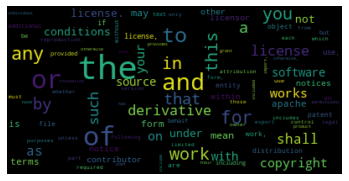

In [46]:
# read wordfreq.tsv to dictionary
import pandas as pd
pd_wordfreq = pd.read_csv('~/wordfreq.tsv', header=None, sep='\t')
dict_wordfreq = dict(zip(pd_wordfreq[0],pd_wordfreq[1])) 

# install wordcloud library
!pip install wordcloud --quiet

# plot wordcloud image
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(max_font_size=40, max_words = 100).generate_from_frequencies(dict_wordfreq)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Create Database & Tables

In [50]:
str = """
DROP DATABASE IF EXISTS userdb CASCADE;
CREATE DATABASE IF NOT EXISTS userdb;

SHOW DATABASES;

CREATE TABLE IF NOT EXISTS userdb.employee 
(id int,
name String,
salary int)
COMMENT 'Employee details'
PARTITIONED BY (profession String)
ROW FORMAT DELIMITED
FIELDS TERMINATED BY '\t'
LINES TERMINATED BY '\n'
STORED AS TEXTFILE;

CREATE TABLE IF NOT EXISTS userdb.profession 
(id int,
description String)
COMMENT 'Profession details'
ROW FORMAT DELIMITED
FIELDS TERMINATED BY '\t'
LINES TERMINATED BY '\n'
STORED AS TEXTFILE;

USE userdb;
SHOW TABLES;
"""

!{HIVE_HOME}/bin/hive -e "{str}"

SLF4J: Class path contains multiple SLF4J bindings.
SLF4J: Found binding in [jar:file:/usr/local/apache-hive-3.1.2-bin/lib/log4j-slf4j-impl-2.10.0.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: Found binding in [jar:file:/usr/local/hadoop-3.3.4/share/hadoop/common/lib/slf4j-reload4j-1.7.36.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: See http://www.slf4j.org/codes.html#multiple_bindings for an explanation.
SLF4J: Actual binding is of type [org.apache.logging.slf4j.Log4jLoggerFactory]
Hive Session ID = efcf15f4-a0f3-42c9-8db0-4faea3c711ff

Logging initialized using configuration in jar:file:/usr/local/apache-hive-3.1.2-bin/lib/hive-common-3.1.2.jar!/hive-log4j2.properties Async: true
Hive Session ID = a749a8ba-ef49-477d-af41-9155fb16bfee
OK
Time taken: 3.417 seconds
OK
Time taken: 0.237 seconds
OK
default
userdb
Time taken: 0.204 seconds, Fetched: 2 row(s)
OK
Time taken: 0.216 seconds
OK
Time taken: 0.438 seconds
OK
Time taken: 0.044 seconds
OK
employee
profession
Time tak

In [51]:
# list warehouse directories
!{HADOOP_HOME}/bin/hdfs dfs -ls -R /user/hive/warehouse/

drwxr-xr-x   - root root       4096 2022-10-18 21:51 /user/hive/warehouse/userdb.db
drwxr-xr-x   - root root       4096 2022-10-18 21:51 /user/hive/warehouse/userdb.db/employee
drwxr-xr-x   - root root       4096 2022-10-18 21:51 /user/hive/warehouse/userdb.db/profession


### Load Tables

In [52]:
# download data files (get link from Github)
!wget {GIT_FILES}/data/employees.tsv -O ~/employees.tsv
!wget {GIT_FILES}/data/professions.tsv -O ~/professions.tsv

--2022-10-18 21:51:52--  https://raw.githubusercontent.com/malcosta/bigdatatechnologies/main/data/employees.tsv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 129 [text/plain]
Saving to: ‘/root/employees.tsv’

/root/employees.tsv 100%[===================>]     129  --.-KB/s    in 0s      

2022-10-18 21:51:52 (5.25 MB/s) - ‘/root/employees.tsv’ saved [129/129]

--2022-10-18 21:51:52--  https://raw.githubusercontent.com/malcosta/bigdatatechnologies/main/data/professions.tsv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 71 [text/

In [53]:
# create new directory in HDFS
!{HADOOP_HOME}/bin/hdfs dfs -mkdir ~/input/

In [54]:
# copy tsv file from local directory to HDFS
!{HADOOP_HOME}/bin/hdfs dfs -copyFromLocal ~/employees.tsv ~/input/
!{HADOOP_HOME}/bin/hdfs dfs -copyFromLocal ~/professions.tsv ~/input/

In [55]:
# load data (tsv files) into tables

str = """
LOAD DATA LOCAL INPATH '/root/input/employees.tsv'
OVERWRITE INTO TABLE userdb.employee;

LOAD DATA LOCAL INPATH '/root/input/professions.tsv'
OVERWRITE INTO TABLE userdb.profession;
"""

!{HIVE_HOME}/bin/hive -e "{str}"

SLF4J: Class path contains multiple SLF4J bindings.
SLF4J: Found binding in [jar:file:/usr/local/apache-hive-3.1.2-bin/lib/log4j-slf4j-impl-2.10.0.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: Found binding in [jar:file:/usr/local/hadoop-3.3.4/share/hadoop/common/lib/slf4j-reload4j-1.7.36.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: See http://www.slf4j.org/codes.html#multiple_bindings for an explanation.
SLF4J: Actual binding is of type [org.apache.logging.slf4j.Log4jLoggerFactory]
Hive Session ID = 65efc5ae-a99e-4067-b657-383bb3fcff3b

Logging initialized using configuration in jar:file:/usr/local/apache-hive-3.1.2-bin/lib/hive-common-3.1.2.jar!/hive-log4j2.properties Async: true
Hive Session ID = 323ae344-9d6e-405c-9700-7cba4cc006ed
Query ID = root_20221018215218_e160ab3b-0cb9-4912-a478-fba87510472c
Total jobs = 3
Launching Job 1 out of 3
Number of reduce tasks not specified. Estimated from input data size: 1
In order to change the average load for a reducer (in bytes

In [56]:
# insert new values to table employee

str = """
INSERT INTO TABLE userdb.employee VALUES (33, 'Rob', 55000, 'Soldier');
INSERT INTO TABLE userdb.employee VALUES (66, 'Clare', 70000, 'Cook');
"""

!{HIVE_HOME}/bin/hive -e "{str}"

SLF4J: Class path contains multiple SLF4J bindings.
SLF4J: Found binding in [jar:file:/usr/local/apache-hive-3.1.2-bin/lib/log4j-slf4j-impl-2.10.0.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: Found binding in [jar:file:/usr/local/hadoop-3.3.4/share/hadoop/common/lib/slf4j-reload4j-1.7.36.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: See http://www.slf4j.org/codes.html#multiple_bindings for an explanation.
SLF4J: Actual binding is of type [org.apache.logging.slf4j.Log4jLoggerFactory]
Hive Session ID = 621ed17a-6a85-4048-ba52-7746c830b715

Logging initialized using configuration in jar:file:/usr/local/apache-hive-3.1.2-bin/lib/hive-common-3.1.2.jar!/hive-log4j2.properties Async: true
Hive Session ID = 5952b061-ba82-4cf0-994b-cf6d5162450e
Query ID = root_20221018215241_561c3d38-1c6b-4898-af33-cb237af2fe96
Total jobs = 3
Launching Job 1 out of 3
Number of reduce tasks not specified. Estimated from input data size: 1
In order to change the average load for a reducer (in bytes

In [57]:
# list data warehouse and database
!{HADOOP_HOME}/bin/hdfs dfs -ls -R /user/hive/warehouse/

drwxr-xr-x   - root root       4096 2022-10-18 21:51 /user/hive/warehouse/userdb.db
drwxr-xr-x   - root root       4096 2022-10-18 21:52 /user/hive/warehouse/userdb.db/employee
drwxr-xr-x   - root root       4096 2022-10-18 21:52 /user/hive/warehouse/userdb.db/employee/profession=Soldier
-rw-r--r--   1 root root         13 2022-10-18 21:52 /user/hive/warehouse/userdb.db/employee/profession=Soldier/000000_0
drwxr-xr-x   - root root       4096 2022-10-18 21:52 /user/hive/warehouse/userdb.db/employee/profession=Engineer
-rw-r--r--   1 root root         16 2022-10-18 21:52 /user/hive/warehouse/userdb.db/employee/profession=Engineer/000000_0
drwxr-xr-x   - root root       4096 2022-10-18 21:52 /user/hive/warehouse/userdb.db/employee/profession=Pilot
-rw-r--r--   1 root root         13 2022-10-18 21:52 /user/hive/warehouse/userdb.db/employee/profession=Pilot/000000_0
drwxr-xr-x   - root root       4096 2022-10-18 21:52 /user/hive/warehouse/userdb.db/employee/profession=Professor
-rw-r--r--  

In [58]:
# show content of one partition - profession=Engineer
!!{HADOOP_HOME}/bin/hdfs dfs -cat /user/hive/warehouse/userdb.db/employee/profession=Engineer/000000_0

['1\tMichael\t50000']

### HiveQL Queries

In [59]:
# describe tables

str = """
DESCRIBE userdb.employee;

DESCRIBE EXTENDED userdb.profession;
"""

!{HIVE_HOME}/bin/hive -e "{str}"

SLF4J: Class path contains multiple SLF4J bindings.
SLF4J: Found binding in [jar:file:/usr/local/apache-hive-3.1.2-bin/lib/log4j-slf4j-impl-2.10.0.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: Found binding in [jar:file:/usr/local/hadoop-3.3.4/share/hadoop/common/lib/slf4j-reload4j-1.7.36.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: See http://www.slf4j.org/codes.html#multiple_bindings for an explanation.
SLF4J: Actual binding is of type [org.apache.logging.slf4j.Log4jLoggerFactory]
Hive Session ID = 8780ddc3-3e67-4bce-a588-0ffaaddf2662

Logging initialized using configuration in jar:file:/usr/local/apache-hive-3.1.2-bin/lib/hive-common-3.1.2.jar!/hive-log4j2.properties Async: true
Hive Session ID = d35cf5ad-317e-4085-84e4-e9918ce40b93
OK
id                  	int                 	                    
name                	string              	                    
salary              	int                 	                    
profession          	string              	     

In [60]:
# show all rows and columns

str = """
SELECT * 
FROM userdb.employee;

SELECT * 
FROM userdb.profession;
"""

!{HIVE_HOME}/bin/hive -e "{str}"

SLF4J: Class path contains multiple SLF4J bindings.
SLF4J: Found binding in [jar:file:/usr/local/apache-hive-3.1.2-bin/lib/log4j-slf4j-impl-2.10.0.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: Found binding in [jar:file:/usr/local/hadoop-3.3.4/share/hadoop/common/lib/slf4j-reload4j-1.7.36.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: See http://www.slf4j.org/codes.html#multiple_bindings for an explanation.
SLF4J: Actual binding is of type [org.apache.logging.slf4j.Log4jLoggerFactory]
Hive Session ID = 49fa55cd-37df-4aa8-ad66-d38fa338fa9a

Logging initialized using configuration in jar:file:/usr/local/apache-hive-3.1.2-bin/lib/hive-common-3.1.2.jar!/hive-log4j2.properties Async: true
Hive Session ID = 746c6480-4d96-4df4-ab74-ff1a1a75c696
OK
66	Clare	70000	Cook
4	Dali	40000	Doctor
1	Michael	50000	Engineer
5	Mary	90000	Pilot
2	Rose	60000	Professor
6	John	70000	Professor
33	Rob	55000	Soldier
3	Ana	40000	Writer
Time taken: 4.102 seconds, Fetched: 8 row(s)
OK
1	Engineer
2	Profe

In [61]:
# show the maximum, minimum an average salary from employee table

str = """
SELECT MAX(salary), MIN(salary), AVG(salary)
FROM userdb.employee 
"""

!{HIVE_HOME}/bin/hive -e "{str}"

SLF4J: Class path contains multiple SLF4J bindings.
SLF4J: Found binding in [jar:file:/usr/local/apache-hive-3.1.2-bin/lib/log4j-slf4j-impl-2.10.0.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: Found binding in [jar:file:/usr/local/hadoop-3.3.4/share/hadoop/common/lib/slf4j-reload4j-1.7.36.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: See http://www.slf4j.org/codes.html#multiple_bindings for an explanation.
SLF4J: Actual binding is of type [org.apache.logging.slf4j.Log4jLoggerFactory]
Hive Session ID = 8ffc55e7-61d0-49ab-8af2-b993f455404e

Logging initialized using configuration in jar:file:/usr/local/apache-hive-3.1.2-bin/lib/hive-common-3.1.2.jar!/hive-log4j2.properties Async: true
Hive Session ID = b7b9cf20-e7c9-469e-80f1-84209f37662f
Query ID = root_20221018215604_3f57fdce-9251-43b3-97bc-042774bd532d
Total jobs = 1
Launching Job 1 out of 1
Number of reduce tasks determined at compile time: 1
In order to change the average load for a reducer (in bytes):
  set hive.exec.

In [62]:
# extract average salary grouped by profession to a local file

str = """
set hive.cli.print.header=true;

SELECT employee.profession as profession, AVG(salary) AS salary
FROM userdb.employee JOIN userdb.profession ON (employee.profession=profession.description)
group by employee.profession
"""

!{HIVE_HOME}/bin/hive -e "{str}" > dump.tsv

SLF4J: Class path contains multiple SLF4J bindings.
SLF4J: Found binding in [jar:file:/usr/local/apache-hive-3.1.2-bin/lib/log4j-slf4j-impl-2.10.0.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: Found binding in [jar:file:/usr/local/hadoop-3.3.4/share/hadoop/common/lib/slf4j-reload4j-1.7.36.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: See http://www.slf4j.org/codes.html#multiple_bindings for an explanation.
SLF4J: Actual binding is of type [org.apache.logging.slf4j.Log4jLoggerFactory]
Hive Session ID = d1a87d00-d558-4326-9930-1ac4da1df864

Logging initialized using configuration in jar:file:/usr/local/apache-hive-3.1.2-bin/lib/hive-common-3.1.2.jar!/hive-log4j2.properties Async: true
Hive Session ID = c635a685-ff65-46e3-8596-9b6a1c54c9bc
Query ID = root_20221018215642_f87bc8a5-351a-4d2d-9029-5a318faf3c69
Total jobs = 1
Execution completed successfully
MapredLocal task succeeded
Launching Job 1 out of 1
Number of reduce tasks not specified. Estimated from input data size: 1

In [63]:
# show local file content
!cat dump.tsv

profession	salary
Doctor	40000.0
Engineer	50000.0
Pilot	90000.0
Professor	65000.0
Writer	40000.0


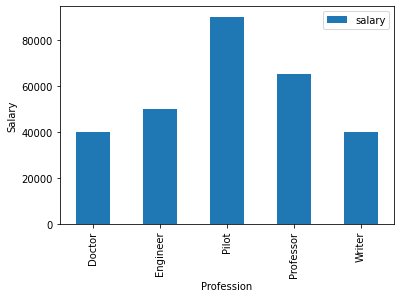

In [64]:
# plot results
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('dump.tsv', sep='\t')

df.plot(kind='bar', x='profession', y='salary')
plt.ylabel('Salary')
plt.xlabel('Profession')
plt.show()

### Hive Functions

In [65]:
# show (top 50) functions

str = """
SHOW FUNCTIONS;
"""

!{HIVE_HOME}/bin/hive -e "{str}" | head -n 50

SLF4J: Class path contains multiple SLF4J bindings.
SLF4J: Found binding in [jar:file:/usr/local/apache-hive-3.1.2-bin/lib/log4j-slf4j-impl-2.10.0.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: Found binding in [jar:file:/usr/local/hadoop-3.3.4/share/hadoop/common/lib/slf4j-reload4j-1.7.36.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: See http://www.slf4j.org/codes.html#multiple_bindings for an explanation.
SLF4J: Actual binding is of type [org.apache.logging.slf4j.Log4jLoggerFactory]
Hive Session ID = 2adf7034-40f4-4ed6-8b7c-e08fd59bb972

Logging initialized using configuration in jar:file:/usr/local/apache-hive-3.1.2-bin/lib/hive-common-3.1.2.jar!/hive-log4j2.properties Async: true
Hive Session ID = a01d5ebb-70b9-42e1-90a0-b121bd92e59f
OK
!
!=
$sum0
%
&
*
+
-
/
<
<=
<=>
<>
=
==
>
>=
^
abs
acos
add_months
aes_decrypt
aes_encrypt
and
array
array_contains
ascii
asin
assert_true
assert_true_oom
atan
avg
base64
between
bin
bloom_filter
bround
cardinality_violation
case
cbrt
c

<a name="challenge"></a>
# Real Challenge

Example of how to find the movies with the highest average rating that received at least 100 ratings, using the MovieLens 100K dataset (https://grouplens.org/datasets/movielens/).
- u.data contains the movie ratings (user_id, movie_id, rating, time)
- u.item contains the movie titles (movie_id, movie_title, ...)

In [66]:
# download movielens dataset
!wget https://files.grouplens.org/datasets/movielens/ml-100k/u.item -O ~/u.item
!wget https://files.grouplens.org/datasets/movielens/ml-100k/u.data -O ~/u.data

--2022-10-18 21:58:24--  https://files.grouplens.org/datasets/movielens/ml-100k/u.item
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 236344 (231K)
Saving to: ‘/root/u.item’

/root/u.item        100%[===================>] 230.80K  --.-KB/s    in 0.09s   

2022-10-18 21:58:24 (2.44 MB/s) - ‘/root/u.item’ saved [236344/236344]

--2022-10-18 21:58:24--  https://files.grouplens.org/datasets/movielens/ml-100k/u.data
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1979173 (1.9M)
Saving to: ‘/root/u.data’

/root/u.data        100%[===================>]   1.89M  11.2MB/s    in 0.2s    

2022-10-18 21:58:24 (11.2 MB/s) - ‘/root/u.data’ saved [1979173/1979173]



In [67]:
# copy movielens dataset to HDFS
!{HADOOP_HOME}/bin/hdfs dfs -copyFromLocal ~/u.item ~/input/
!{HADOOP_HOME}/bin/hdfs dfs -copyFromLocal ~/u.data ~/input/

In [68]:
# show first 5 lines
!{HADOOP_HOME}/bin/hdfs dfs -cat ~/input/u.item | head -n 5
!{HADOOP_HOME}/bin/hdfs dfs -cat ~/input/u.data | head -n 5

1|Toy Story (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Toy%20Story%20(1995)|0|0|0|1|1|1|0|0|0|0|0|0|0|0|0|0|0|0|0
2|GoldenEye (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?GoldenEye%20(1995)|0|1|1|0|0|0|0|0|0|0|0|0|0|0|0|0|1|0|0
3|Four Rooms (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Four%20Rooms%20(1995)|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|1|0|0
4|Get Shorty (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Get%20Shorty%20(1995)|0|1|0|0|0|1|0|0|1|0|0|0|0|0|0|0|0|0|0
5|Copycat (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Copycat%20(1995)|0|0|0|0|0|0|1|0|1|0|0|0|0|0|0|0|1|0|0
cat: Unable to write to output stream.
196	242	3	881250949
186	302	3	891717742
22	377	1	878887116
244	51	2	880606923
166	346	1	886397596
cat: Unable to write to output stream.


### Hive Solution

In [69]:
#create tables 
str = """
CREATE TABLE IF NOT EXISTS userdb.ratings
(userId INT, movieId INT, rating INT, ratingTime INT)
ROW FORMAT DELIMITED
FIELDS TERMINATED BY '\t'
LINES TERMINATED BY '\n'
STORED AS TEXTFILE;

CREATE TABLE IF NOT EXISTS userdb.movies
(movieId int, movieTitle varchar(200), releaseDate date, videoReleaseDate date, imdbUrl varchar(300), flagGenreUnknown int, flagGenreAction int, flagGenreAdventure int, flagGenreAnimation int, flagGenreChildrens int, flagGenreComedy int, flagGenreCrime int, flagGenreDocumentary int, flagGenreDrama int, flagGenreFantasy int, flagGenreFilmNoir int, flagGenreHorror int, flagGenreMusical int,  flagGenreMystery int, flagGenreRomance int, flagGenreSciFi int, flagGenreThriller int, flagGenreWar int, flagGenreWestern int)
ROW FORMAT DELIMITED
FIELDS TERMINATED BY '|'
LINES TERMINATED BY '\n'
STORED AS TEXTFILE;
"""

!{HIVE_HOME}/bin/hive -e "{str}"

SLF4J: Class path contains multiple SLF4J bindings.
SLF4J: Found binding in [jar:file:/usr/local/apache-hive-3.1.2-bin/lib/log4j-slf4j-impl-2.10.0.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: Found binding in [jar:file:/usr/local/hadoop-3.3.4/share/hadoop/common/lib/slf4j-reload4j-1.7.36.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: See http://www.slf4j.org/codes.html#multiple_bindings for an explanation.
SLF4J: Actual binding is of type [org.apache.logging.slf4j.Log4jLoggerFactory]
Hive Session ID = 648b8a83-dce2-4db0-a98e-5c54849fb727

Logging initialized using configuration in jar:file:/usr/local/apache-hive-3.1.2-bin/lib/hive-common-3.1.2.jar!/hive-log4j2.properties Async: true
Hive Session ID = 968f029b-f811-4950-b930-8225429b9afb
OK
Time taken: 2.151 seconds
OK
Time taken: 0.141 seconds


In [70]:
# load data
str = """
LOAD DATA LOCAL INPATH '/root/input/u.data'
OVERWRITE INTO TABLE userdb.ratings;

LOAD DATA LOCAL INPATH '/root/input/u.item'
OVERWRITE INTO TABLE userdb.movies;
"""

!{HIVE_HOME}/bin/hive -e "{str}"

SLF4J: Class path contains multiple SLF4J bindings.
SLF4J: Found binding in [jar:file:/usr/local/apache-hive-3.1.2-bin/lib/log4j-slf4j-impl-2.10.0.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: Found binding in [jar:file:/usr/local/hadoop-3.3.4/share/hadoop/common/lib/slf4j-reload4j-1.7.36.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: See http://www.slf4j.org/codes.html#multiple_bindings for an explanation.
SLF4J: Actual binding is of type [org.apache.logging.slf4j.Log4jLoggerFactory]
Hive Session ID = cd295d3d-b8e7-4e28-9d6e-04e36e53889e

Logging initialized using configuration in jar:file:/usr/local/apache-hive-3.1.2-bin/lib/hive-common-3.1.2.jar!/hive-log4j2.properties Async: true
Hive Session ID = c4b63d5b-da14-4072-901f-eef23191bdbb
Loading data to table userdb.ratings
OK
Time taken: 2.623 seconds
Loading data to table userdb.movies
OK
Time taken: 0.332 seconds


In [71]:
# show top 10 rows from both tables
str = """
select * 
from userdb.ratings 
limit 10;

select movieId, movieTitle 
from userdb.movies 
limit 10;
"""

!{HIVE_HOME}/bin/hive -e "{str}"

SLF4J: Class path contains multiple SLF4J bindings.
SLF4J: Found binding in [jar:file:/usr/local/apache-hive-3.1.2-bin/lib/log4j-slf4j-impl-2.10.0.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: Found binding in [jar:file:/usr/local/hadoop-3.3.4/share/hadoop/common/lib/slf4j-reload4j-1.7.36.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: See http://www.slf4j.org/codes.html#multiple_bindings for an explanation.
SLF4J: Actual binding is of type [org.apache.logging.slf4j.Log4jLoggerFactory]
Hive Session ID = 77a6fe36-fcb9-496a-9e0e-071061b85f16

Logging initialized using configuration in jar:file:/usr/local/apache-hive-3.1.2-bin/lib/hive-common-3.1.2.jar!/hive-log4j2.properties Async: true
Hive Session ID = ca97b19e-d81d-4457-b0cc-b26038c0360e
OK
196	242	3	881250949
186	302	3	891717742
22	377	1	878887116
244	51	2	880606923
166	346	1	886397596
298	474	4	884182806
115	265	2	881171488
253	465	5	891628467
305	451	3	886324817
6	86	3	883603013
Time taken: 4.011 seconds, Fetched: 10 ro

In [72]:
# show the 10 movies with the highest average rating and which received at least 100 ratings
str = """
with rat as 
  (select movieId, avg(rating) as avgRating, count(*) as cnt 
  from userdb.ratings 
  group by movieId) 
select rat.movieId, mov.movieTitle, rat.avgRating 
from rat join userdb.movies mov on rat.movieId=mov.movieId 
where cnt >= 100
order by avgRating desc 
limit 10;
"""

!{HIVE_HOME}/bin/hive -e "{str}"

SLF4J: Class path contains multiple SLF4J bindings.
SLF4J: Found binding in [jar:file:/usr/local/apache-hive-3.1.2-bin/lib/log4j-slf4j-impl-2.10.0.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: Found binding in [jar:file:/usr/local/hadoop-3.3.4/share/hadoop/common/lib/slf4j-reload4j-1.7.36.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: See http://www.slf4j.org/codes.html#multiple_bindings for an explanation.
SLF4J: Actual binding is of type [org.apache.logging.slf4j.Log4jLoggerFactory]
Hive Session ID = f5bfedc9-b652-4c5d-85c5-9e357895266c

Logging initialized using configuration in jar:file:/usr/local/apache-hive-3.1.2-bin/lib/hive-common-3.1.2.jar!/hive-log4j2.properties Async: true
Hive Session ID = f1dc2de6-be89-41b0-a3d7-cf8fb4241d47
Query ID = root_20221018220226_1d832839-9840-4042-91a9-77c73c57e221
Total jobs = 2
Launching Job 1 out of 2
Number of reduce tasks not specified. Estimated from input data size: 1
In order to change the average load for a reducer (in bytes

# Final Message

Congratulations if you reached the end of this Notebook successfully! 

You should know by now how to solve Big Data problems using Hadoop and Hive. Despite the simplicity of the problems presented, they require the use of typical data operations such as read, store, join, aggregate, filter, and apply user-defined transformations. These operations form the basis for more complex applications that you should try to implement.